In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_excel("/workspaces/Customer-Segmentation-Retention-Analysis/data/raw/Online_Retail.xlsx")

print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[us]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  str           
dtypes: datetime64[us](1), float64(2), int64(1), object(3), str(1)
memory usage: 33.1+ MB


In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(5268)

In [9]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [10]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df["InvoiceDate"].head()

0   2010-12-01 08:26:00
1   2010-12-01 08:26:00
2   2010-12-01 08:26:00
3   2010-12-01 08:26:00
4   2010-12-01 08:26:00
Name: InvoiceDate, dtype: datetime64[us]

In [11]:
# 1️⃣ Remove rows without CustomerID
df = df.dropna(subset=["CustomerID"])

# 2️⃣ Remove cancelled orders (InvoiceNo starting with 'C')
df = df[~df["InvoiceNo"].astype(str).str.startswith("C")]

# 3️⃣ Keep only positive Quantity and UnitPrice
df = df[(df["Quantity"] > 0) & (df["UnitPrice"] > 0)]

print("Cleaned Dataset Shape:", df.shape)

Cleaned Dataset Shape: (397884, 8)


In [12]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [13]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [14]:
# Quick check of unique customers
print("Number of unique customers:", df["CustomerID"].nunique())

Number of unique customers: 4338


In [15]:
# Check basic stats for Quantity and UnitPrice
print(df[["Quantity", "UnitPrice"]].describe())

            Quantity      UnitPrice
count  397884.000000  397884.000000
mean       12.988238       3.116488
std       179.331775      22.097877
min         1.000000       0.001000
25%         2.000000       1.250000
50%         6.000000       1.950000
75%        12.000000       3.750000
max     80995.000000    8142.750000


RFM = Recency, Frequency, Monetary
We will calculate 3 key metrics per customer:
  - Recency → Days since last purchase
  - Frequency → Number of purchases
  - Monetary → Total spending

These 3 features are the foundation of customer segmentation.

In [16]:
# Snapshot date = 1 day after last invoice
snapshot_date = df["InvoiceDate"].max() + pd.Timedelta(days=1)
print("Snapshot Date:", snapshot_date)

Snapshot Date: 2011-12-10 12:50:00


In [17]:
# Group by CustomerID
rfm = df.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (snapshot_date - x.max()).days,  # Recency
    "InvoiceNo": "nunique",                                    # Frequency
    "Quantity": lambda x: (x * df.loc[x.index, "UnitPrice"]).sum()  # Monetary
})

# Rename columns
rfm.rename(columns={
    "InvoiceDate": "Recency",
    "InvoiceNo": "Frequency",
    "Quantity": "Monetary"
}, inplace=True)

# Quick check
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40


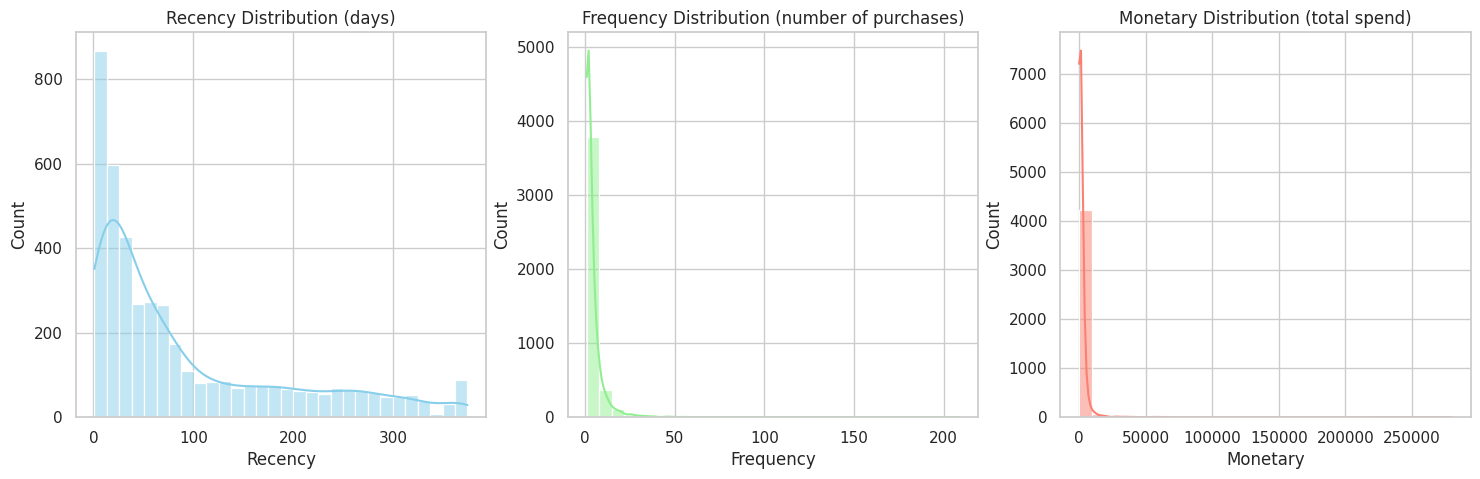

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Plot distributions
fig, axes = plt.subplots(1, 3, figsize=(18,5))

sns.histplot(rfm["Recency"], bins=30, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title("Recency Distribution (days)")

sns.histplot(rfm["Frequency"], bins=30, kde=True, ax=axes[1], color='lightgreen')
axes[1].set_title("Frequency Distribution (number of purchases)")

sns.histplot(rfm["Monetary"], bins=30, kde=True, ax=axes[2], color='salmon')
axes[2].set_title("Monetary Distribution (total spend)")

plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler

# Copy RFM to avoid modifying original
rfm_scaled = rfm.copy()

# Features to scale
scaler = StandardScaler()
rfm_scaled[['Recency', 'Frequency', 'Monetary']] = scaler.fit_transform(rfm_scaled[['Recency', 'Frequency', 'Monetary']])

# Quick check
rfm_scaled.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,2.334574,-0.425097,8.358668
12347.0,-0.905340,0.354417,0.250966
12348.0,-0.175360,-0.035340,-0.028596
12349.0,-0.735345,-0.425097,-0.033012
12350.0,2.174578,-0.425097,-0.191347


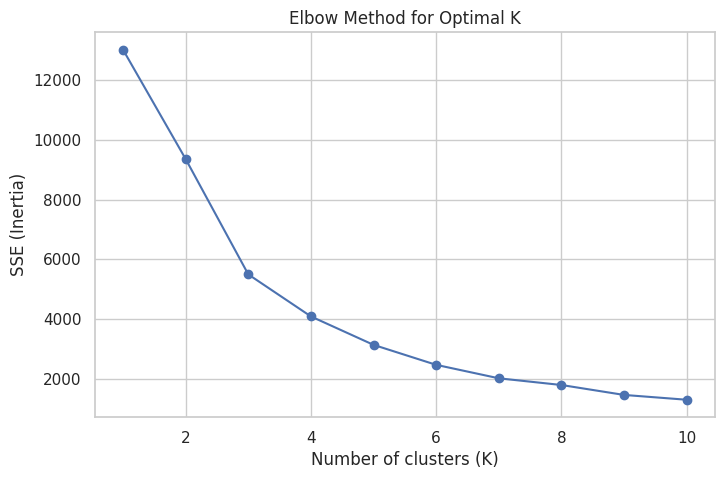

In [20]:
#--------------------Elbow Method------------------
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Try K from 1 to 10
sse = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)

# Plot SSE vs K
plt.figure(figsize=(8,5))
plt.plot(K_range, sse, marker='o')
plt.xlabel("Number of clusters (K)")
plt.ylabel("SSE (Inertia)")
plt.title("Elbow Method for Optimal K")
plt.show()

In [21]:
# ----------------------K-Means Clustering------------------
# Choose K (replace 4 with your elbow choice)
optimal_k = 4

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
rfm_scaled['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Merge cluster labels with original RFM
rfm['Cluster'] = rfm_scaled['Cluster']

# Quick look at cluster counts
print(rfm['Cluster'].value_counts())

Cluster
0    3054
1    1067
3     204
2      13
Name: count, dtype: int64


In [22]:
# Compute average RFM values per cluster
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(1)

cluster_summary.columns = ['RecencyMean', 'FrequencyMean', 'MonetaryMean', 'CustomerCount']
cluster_summary = cluster_summary.sort_values('MonetaryMean', ascending=False)
cluster_summary

,RecencyMean,FrequencyMean,MonetaryMean,CustomerCount
Cluster,,,,
2,7.4,82.5,127338.3,13
3,15.5,22.3,12709.1,204
0,43.7,3.7,1359.0,3054
1,248.1,1.6,480.6,1067


In [23]:
#-----------------------------Cohort Analysis------------------------------
# Extract year-month of first purchase for each customer
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')

# First purchase month per customer
first_purchase = df.groupby('CustomerID')['InvoiceMonth'].min().reset_index()
first_purchase.columns = ['CustomerID', 'FirstPurchaseMonth']

# Merge with original data
df_cohort = df.merge(first_purchase, on='CustomerID')

# Calculate cohort index (months since first purchase)
df_cohort['CohortIndex'] = (df_cohort['InvoiceMonth'].dt.year - df_cohort['FirstPurchaseMonth'].dt.year)*12 + \
                           (df_cohort['InvoiceMonth'].dt.month - df_cohort['FirstPurchaseMonth'].dt.month) + 1

# Cohort table: number of unique customers per cohort per month
cohort_data = df_cohort.groupby(['FirstPurchaseMonth', 'CohortIndex'])['CustomerID'].nunique().reset_index()

# Pivot for heatmap
cohort_counts = cohort_data.pivot(index='FirstPurchaseMonth', columns='CohortIndex', values='CustomerID')

# Retention rate
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)


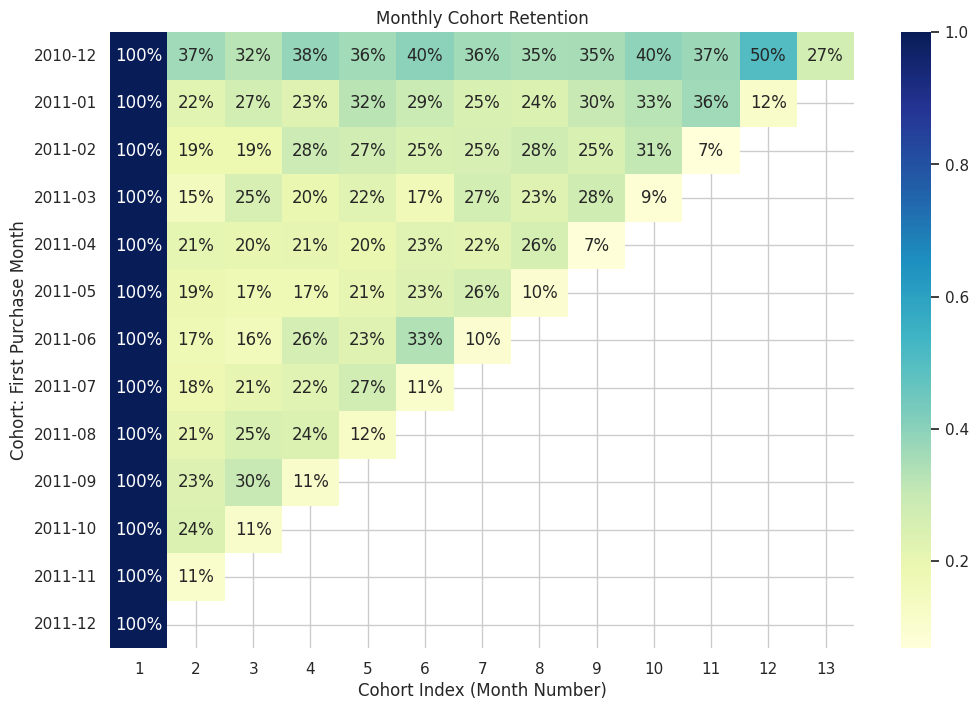

In [24]:
# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(retention, annot=True, fmt=".0%", cmap="YlGnBu")
plt.title("Monthly Cohort Retention")
plt.ylabel("Cohort: First Purchase Month")
plt.xlabel("Cohort Index (Month Number)")
plt.show()

In [25]:
# Aggregate cluster RFM stats
rfm_summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(1)

rfm_summary.columns = ['RecencyMean', 'FrequencyMean', 'MonetaryMean', 'CustomerCount']
rfm_summary = rfm_summary.sort_values('MonetaryMean', ascending=False)
rfm_summary


,RecencyMean,FrequencyMean,MonetaryMean,CustomerCount
Cluster,,,,
2,7.4,82.5,127338.3,13
3,15.5,22.3,12709.1,204
0,43.7,3.7,1359.0,3054
1,248.1,1.6,480.6,1067


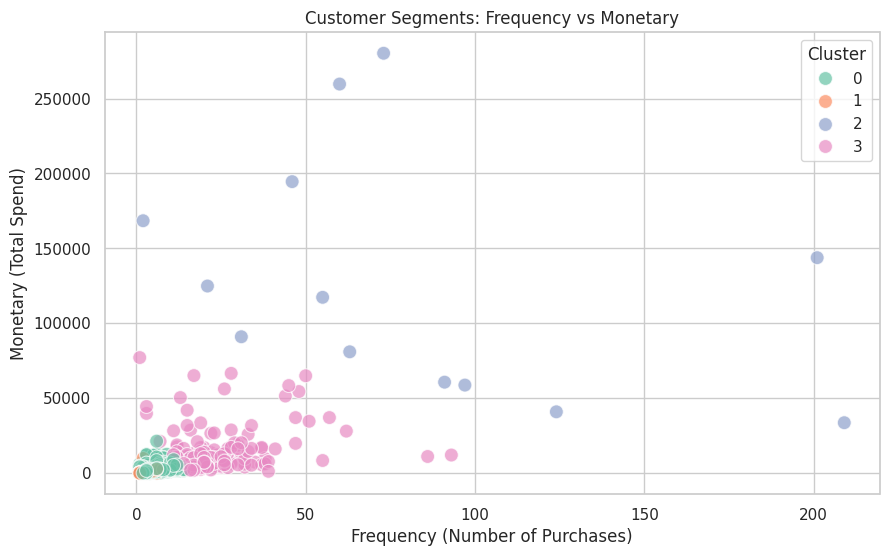

In [26]:
# RFM Scatter Plot (Frequency vs Monetary, colored by cluster)

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=rfm, 
    x='Frequency', y='Monetary', 
    hue='Cluster', palette='Set2', 
    s=100, alpha=0.7
)
plt.title('Customer Segments: Frequency vs Monetary')
plt.xlabel('Frequency (Number of Purchases)')
plt.ylabel('Monetary (Total Spend)')
plt.legend(title='Cluster')
plt.show()

/tmp/ipykernel_16410/2094249373.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Recency', data=rfm, palette='Set3')


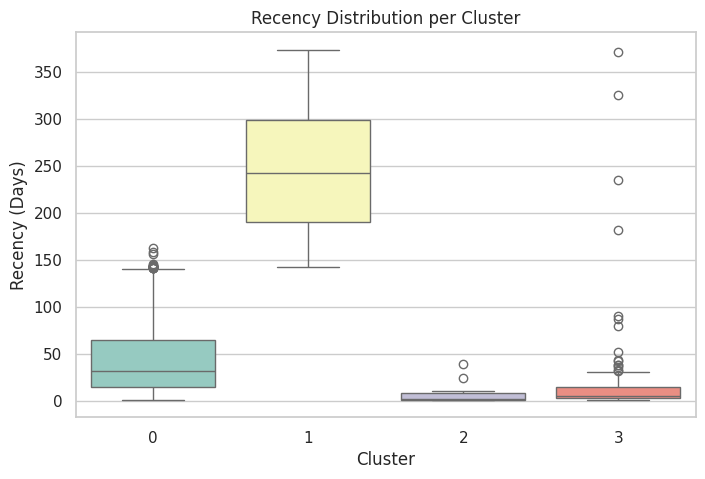

In [27]:
# Recency Boxplot per Cluster

plt.figure(figsize=(8,5))
sns.boxplot(x='Cluster', y='Recency', data=rfm, palette='Set3')
plt.title('Recency Distribution per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Recency (Days)')
plt.show()

In [28]:
# Export Clustered RFM Table

rfm.to_csv("../outputs/rfm_clusters.csv", index=True)
print("RFM with clusters exported successfully!")

RFM with clusters exported successfully!
